In [26]:
#Importing required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
#Reading input crime related data
all_details = gpd.read_file('D:\All_details\All_details.shp')

In [28]:
print(all_details.keys())

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'CrimeDate', 'CrimeTime',
       'CrimeCode', 'Location', 'Descriptio', 'Inside_Out', 'Weapon', 'Post',
       'District', 'Neighborho', 'Longitude', 'Latitude', 'Location_1',
       'Premise', 'Total_Inci', 'FID_1', 'Id', 'Input_FID', 'Count_',
       'Sum_Post', 'Sum_Longit', 'Sum_Latitu', 'Sum_Total', 'geometry'],
      dtype='object')


In [29]:
#Handling missing values
all_details=all_details.dropna()

In [30]:
all_details.shape

(89943, 27)

In [20]:
#Condition for extracting Hotspots
#If hexagon has crime count greater than 143 then it is considered as hotspot
all_details=all_details[all_details['Count_']>143]

In [34]:
all_details.to_csv('D:\Result Visualization\Affected_Areas.csv')

In [21]:
all_details= all_details.drop_duplicates(subset='Input_FID', keep="first")

In [10]:
#Finding district wise hotspot
Districtwise_hotspots=all_details['District'].value_counts()

In [13]:
districtwise=all_details

In [16]:
#Converting our dataframe to a shape file so that we can import that into ArcGIS application
import geopandas
shopie = geopandas.GeoDataFrame(districtwise)

In [17]:
#Exporting our shape file
districtwise.to_file('D:districtwise.shp')

In [15]:
districtwise.shape

(287, 27)

In [11]:
Districtwise_hotspots

SOUTHEASTERN    80
CENTRAL         69
EASTERN         27
SOUTHERN        23
NORTHERN        21
WESTERN         20
NORTHEASTERN    16
SOUTHWESTERN    16
NORTHWESTERN    15
Name: District, dtype: int64

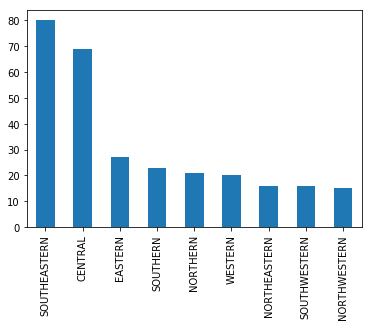

In [12]:
Districtwise_hotspots.plot(kind="bar")

In [24]:
Neighbourhood_affected=all_details['Neighborho'].value_counts()

In [25]:
Neighbourhood_affected

Downtown                     2623
McElderry Park               1014
Patterson Park Neighborho     790
Ellwood Park/Monument         699
Baltimore Highlands           680
Fells Point                   626
Upton                         591
Charles North                 446
Mondawmin                     432
Dunbar-Broadway               414
Sandtown-Winchester           388
Inner Harbor                  370
Penn North                    328
Washington Village/Pigtow     309
Penn-Fallsway                 293
Madison-Eastend               290
Federal Hill                  287
Central Park Heights          268
Carroll - Camden Industri     267
New Southwest/Mount Clare     251
Milton-Montford               242
Belair-Edison                 237
Carrollton Ridge              237
Perkins Homes                 236
Madison Park                  235
Hamilton Hills                229
Greektown                     225
Druid Heights                 223
Frankford                     204
Mount Vernon  

In [26]:
Neighbourhood_affected=Neighbourhood_affected.head(10)

In [27]:
Neighbourhood_affected

Downtown                     2623
McElderry Park               1014
Patterson Park Neighborho     790
Ellwood Park/Monument         699
Baltimore Highlands           680
Fells Point                   626
Upton                         591
Charles North                 446
Mondawmin                     432
Dunbar-Broadway               414
Name: Neighborho, dtype: int64

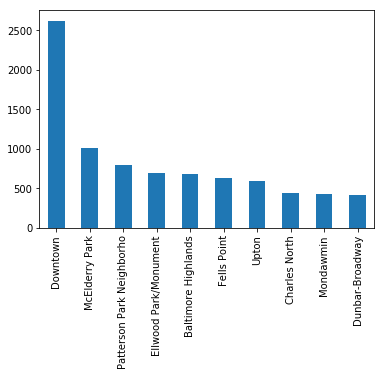

In [28]:
Neighbourhood_affected.plot(kind="bar")

In [22]:
Neighbourhood_affected=all_details['Neighborho'].value_counts()


In [25]:
Neighbourhood_affected.head(15)

Downtown                     27
Patterson Park Neighborho    16
McElderry Park               10
Inner Harbor                  8
Baltimore Highlands           8
Ellwood Park/Monument         8
Upton                         7
Fells Point                   7
Charles North                 6
Jonestown                     5
Madison-Eastend               5
Mid-Town Belvedere            5
Washington Village/Pigtow     5
Madison Park                  4
Carrollton Ridge              4
Name: Neighborho, dtype: int64

In [14]:
#Random check
all_details[all_details['Input_FID']=='Downtown'].head(5)

,OBJECTID,Join_Count,TARGET_FID,CrimeDate,CrimeTime,CrimeCode,Location,Descriptio,Inside_Out,Weapon,...,Total_Inci,FID_1,Id,Input_FID,Count_,Sum_Post,Sum_Longit,Sum_Latitu,Sum_Total,geometry
57,58,1,57,2017-09-02,2:50:00,4E,CALVERT ST & E FAYETTE ST,COMMON ASSAULT,O,HANDS,...,1,4958,0,8146,525,58275,-40221.47154,20627.19839,525,POINT (-76.61252 39.29049)
109,110,1,109,2017-09-01,14:00:00,3AK,200 N HOWARD ST,ROBBERY - STREET,O,KNIFE,...,1,886,0,8266,166,18426,-12718.71704,6522.42045,166,POINT (-76.61961 39.29164)
114,115,1,114,2017-09-01,12:30:00,4E,400 E BALTIMORE ST,COMMON ASSAULT,I,HANDS,...,1,4757,0,8086,371,41181,-28422.46718,14576.46745,371,POINT (-76.61015 39.28976)
318,319,1,318,2017-08-30,21:11:39,2A,BALTIMORE ST & S FREDERICK ST,RAPE,I,OTHER,...,1,4752,0,8087,214,23754,-16393.93031,8407.95414,214,POINT (-76.60813 39.28982)
356,357,1,356,2017-08-30,15:40:00,4E,500 E BALTIMORE ST,COMMON ASSAULT,I,HANDS,...,1,4963,0,8147,415,46065,-31792.83291,16305.32206,415,POINT (-76.60882 39.28981)
